In [2]:
import warnings; 
warnings.simplefilter('ignore')

# 0. Install and Import Dependencies

In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet

In [7]:
import pandas as pd
from prophet import Prophet

# 1. Read in Data and Process Dates

In [8]:
url = "https://raw.githubusercontent.com/nicknochnack/TimeSeriesForecastingProphet/main/dataset.csv"

df = pd.read_csv(url)

In [9]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [10]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [11]:
print(df["Product"].unique())
print(df["Store"].unique())

[2667437]
['QLD_CW_ST0203']


In [12]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [13]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [14]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

# 2. Train Model

In [15]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

Initial log joint probability = -33.1653
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1946.2   0.000414052       95.8202      0.1724      0.7406      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       1946.42   0.000275957       98.7166   2.852e-06       0.001      219  LS failed, Hessian reset 
     199       1946.46   1.25704e-06       64.8826     0.04066           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       1946.46   1.19749e-07       43.6799      0.3111      0.8234      307   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


# 3. Forecast Away

In [16]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.462653,903.588350,3977.059080,3040.462653,3040.462653,-645.839364,-645.839364,-645.839364,463.68979,...,16.643716,16.643716,16.643716,-1126.172870,-1126.172870,-1126.172870,0.0,0.0,0.0,2394.623289
1,2018-01-02,3041.255696,851.920619,3964.713025,3041.255696,3041.255696,-655.816581,-655.816581,-655.816581,463.68979,...,-11.263085,-11.263085,-11.263085,-1108.243287,-1108.243287,-1108.243287,0.0,0.0,0.0,2385.439115
2,2018-01-03,3042.048740,877.836308,4073.501643,3042.048740,3042.048740,-629.836306,-629.836306,-629.836306,463.68979,...,-4.394888,-4.394888,-4.394888,-1089.131208,-1089.131208,-1089.131208,0.0,0.0,0.0,2412.212434
3,2018-01-04,3042.841783,928.515962,4067.335807,3042.841783,3042.841783,-582.757660,-582.757660,-582.757660,463.68979,...,22.467514,22.467514,22.467514,-1068.914964,-1068.914964,-1068.914964,0.0,0.0,0.0,2460.084123
4,2018-01-05,3043.634827,881.562947,3941.186014,3043.634827,3043.634827,-618.630432,-618.630432,-618.630432,463.68979,...,-34.594707,-34.594707,-34.594707,-1047.725516,-1047.725516,-1047.725516,0.0,0.0,0.0,2425.004394


In [17]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4241.364176,2083.543362,5297.896128,4238.660233,4244.095673,-518.137410,-518.137410,-518.137410,463.68979,...,16.643716,16.643716,16.643716,-998.470917,-998.470917,-998.470917,0.0,0.0,0.0,3723.226765
1176,2021-03-23,4242.434777,2109.495549,5323.404362,4239.676205,4245.182281,-535.598019,-535.598019,-535.598019,463.68979,...,-11.263085,-11.263085,-11.263085,-988.024724,-988.024724,-988.024724,0.0,0.0,0.0,3706.836758
1177,2021-03-24,4243.505378,2037.736339,5295.687902,4240.692485,4246.284122,-521.063000,-521.063000,-521.063000,463.68979,...,-4.394888,-4.394888,-4.394888,-980.357903,-980.357903,-980.357903,0.0,0.0,0.0,3722.442378
1178,2021-03-25,4244.575980,2215.876276,5336.592878,4241.714939,4247.412993,-489.896577,-489.896577,-489.896577,463.68979,...,22.467514,22.467514,22.467514,-976.053882,-976.053882,-976.053882,0.0,0.0,0.0,3754.679403
1179,2021-03-26,4245.646581,2181.328988,5170.841042,4242.737393,4248.541864,-546.515985,-546.515985,-546.515985,463.68979,...,-34.594707,-34.594707,-34.594707,-975.611069,-975.611069,-975.611069,0.0,0.0,0.0,3699.130596


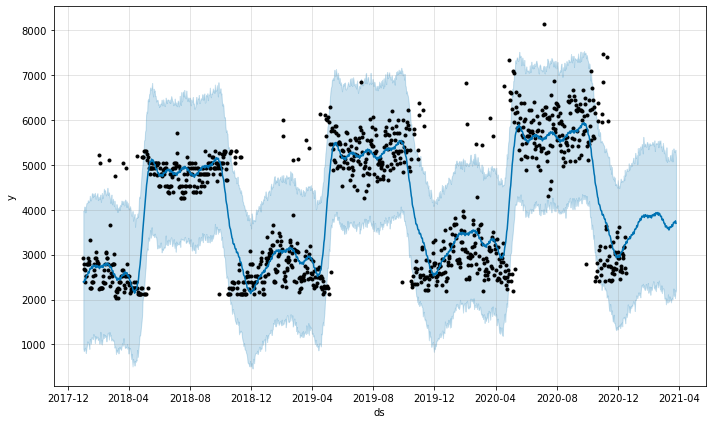

In [18]:
plot1 = m.plot(forecast)

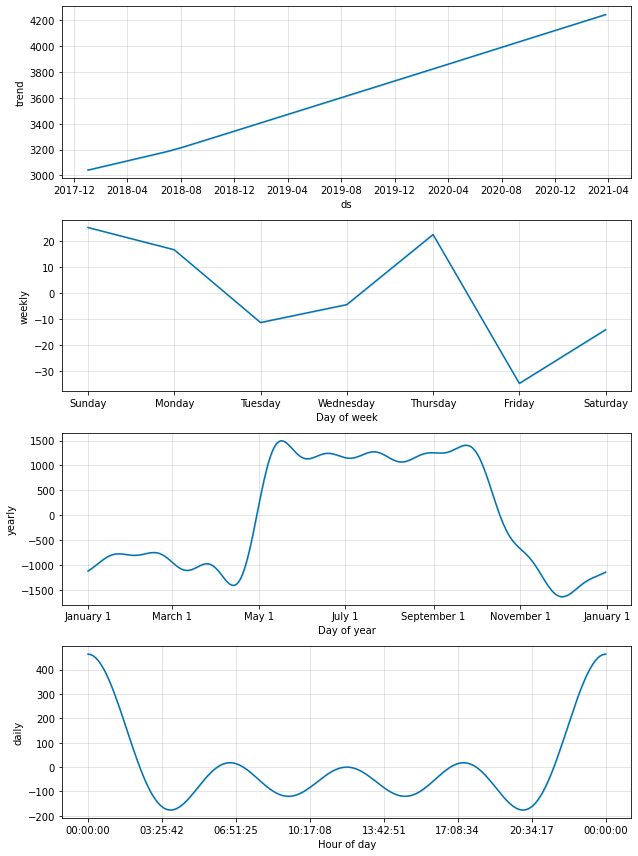

In [19]:
plt2 = m.plot_components(forecast)